[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/eldanc/mlbootcamp2023/blob/main/lab_1_2_svms.ipynb)

# UofT FASE ML Bootcamp
#### Wednesday, June 26, 2023
#### Social Network Analysis - Lab 5, Day 5
#### https://github.com/eldanc/mlbootcamp2023/blob/main/lab_1_1_basics.ipynb
##### Lab author: Shehnaz Islam, shehnaz.islam@mail.utoronto.ca, edited by Eldan Cohen

In this lab, we will cover Social Network Analysis (SNA) using networkx and plotly python libraries. Topics include:


* Introduction to network graphs and properties
* Building and analyzing a Facebook network with networkx and plotly
* Visualizing and analyzing network connectivity with various measures
* Implementing community detection algorithms for finding network communities.


Note: Some other useful Python libraries include matplotlib (for plotting/graphing) and Pandas (for data analysis), though we won't be going into detail on these in this bootcamp.



# Facebook Network Analysis

We will be conducting social network analysis on a Facebook dataset using NetworkX library.
The dataset can be found in the [stanford website](https://snap.stanford.edu/data/ego-Facebook.html). Before we look into the data, lets get some basics out of the way.

</br>

Network graphs can be directed or undirected:

**Directed graphs** have edges with direction. The edges indicate a one-way relationship, in that each edge can only be traversed in a single direction.

**Undirected graphs** have edges that do not have a direction. The edges indicate a two-way relationship, in that each edge can be traversed in both directions.


A facebook network is an **undirected** and **unweighted** (i.e. no weights/numeric value assigned to each edge) graph because one user can become friends with another user just once. Thus, the direction of edges in the graph does not matter.

In [ ]:
# Import libaraies
%matplotlib inline
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from random import randint

## Load the dataset

<img src="https://drive.google.com/uc?export=view&id=1d8s_-fGNQ63wjjRgyF-RNQl7X5K0D2h5" width="300" height="300">

Looking at the dataset as a Network Graph:
* Each Node represent an anonymized facebook user.
* Each Edge corresponds to the friendship of two facebook users that belong to this network.

To simplify the problem, we will be analyzing the friend list of only 10 nodes (users) specified below:

Nodes 0, 107, 348, 414, 686, 698, 1684, 1912, 3437, 3980

We'll refer to these nodes as "**spotlight nodes**" throughput this lab.



In [ ]:
!git clone https://github.com/AllenDowney/ComplexityScience.git

Cloning into 'ComplexityScience'...
remote: Enumerating objects: 119, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 119 (delta 13), reused 23 (delta 5), pack-reused 88
Receiving objects: 100% (119/119), 19.14 MiB | 15.97 MiB/s, done.
Resolving deltas: 100% (53/53), done.


In [ ]:
# Laod the dataset into a pandas dataframe
facebook = pd.read_csv(
    "ComplexityScience/facebook_combined.txt.gz",
    sep=" ",
    names=["start_node", "end_node"],
)
facebook

,start_node,end_node
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5
...,...,...
88229,4026,4030
88230,4027,4031
88231,4027,4032
88232,4027,4038



The edges are loaded and saved in a dataframe. Each row of the dataframe represents an edge, specifying its start node and end node. The graph can be created from this edge list dataframe using networkx library.

In [ ]:
# Create the Graph from the dataframe of edges
G = nx.from_pandas_edgelist(facebook, "start_node", "end_node")

A list of nodes and edges can be viewed using:
**G.nodes()** and **G.edges()** methods.

In [ ]:
print("First 5 nodes: ",list(G.nodes())[:5])
print("First 5 edges: ",list(G.edges())[:5])

First 5 nodes:  [0, 1, 2, 3, 4]
First 5 edges:  [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5)]


The total number of nodes can be computed using the **.number_of_nodes()** method on the graph variable G.

In [ ]:
G.number_of_nodes()

4039


Similarly the total number of edges can be computed using the **.number_of_edges()** method on G.

**YOUR TURN:**

Compute the number of connections in the graph using the method **.number_of_edges()**. ____

In [ ]:
## YOUR CODE HERE



## Visualize the Graph

Visualization plays a central role in exploratory data analysis to help get a qualitative feel for the data. NetworkX provides several different algorithms for visulaizaing grapgh layouts. A full list of layouts can be found [here](https://networkx.org/documentation/stable/reference/drawing.html#module-networkx.drawing.layout).


To get some sense of structure in the data, let's start by viewing the graph with **spring_layout**.



### Spring Layout

The spring_layout function takes into account the nodes and edges to compute locations of the nodes. The downside however, is that this process is much more computationally expensive, and can be quite slow for graphs with 100’s of nodes and 1000’s of edges. The name "*spring*" comes from the fact that two nodes push away from each other while the edges between them pull them closer.

The layout is generated using **nx.spring_layout(G, iterations=15, seed=1721)**.

To ensure a reasonable computational time, we use 15 **iterations** to determine optimal node positions in the graph. The **seed** value of 1721 ensures reproducibility, enabling consistent generation of the same plot.

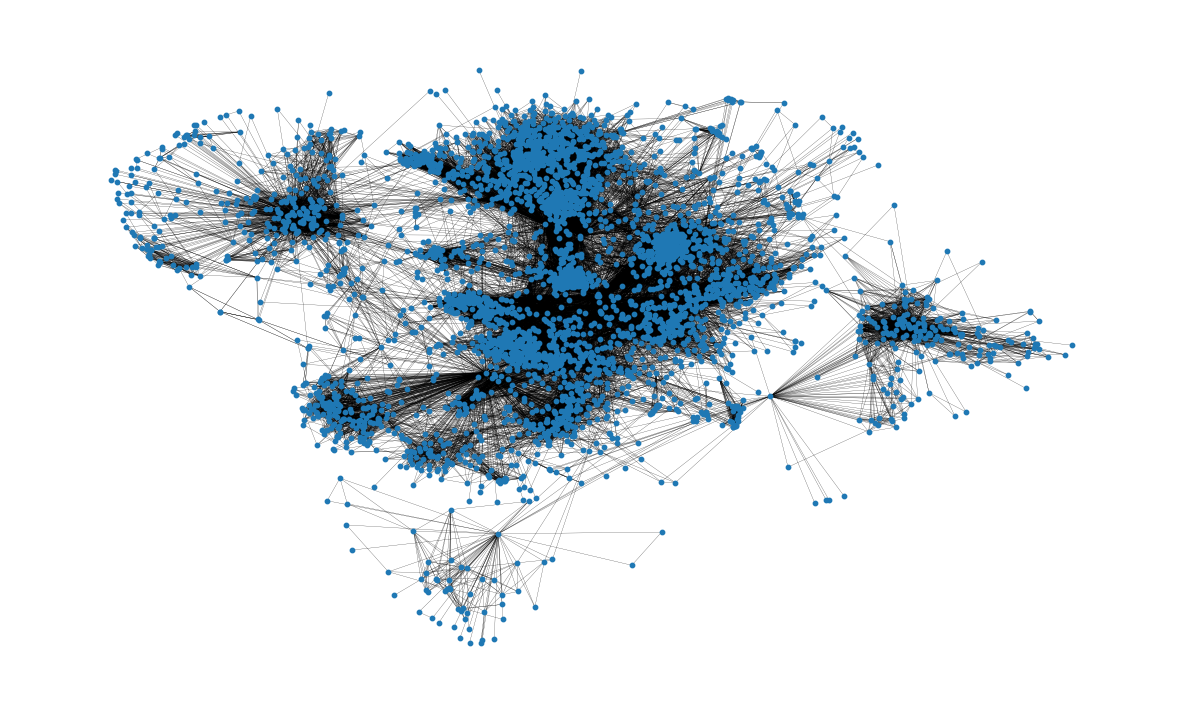

In [ ]:
pos = nx.spring_layout(G, iterations=15, seed=1721) # iterations=15, seed=1721 are parameters specific to spring layout.
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
nx.draw_networkx(G, pos=pos, ax=ax, **plot_options) # pass in the grapgh G and specified layout positions pos

The visualization is quite insightful! We can get a sense of the network structure like how certain nodes are connected more closely to each other compared to others. The layout also gives a qualitative sense of clustering formed by some group of nodes.

**YOUR TURN:**


*  Try using a different layout from the networkX library to plot the graph. You can find a full list of available layouts [here](https://networkx.org/documentation/stable/reference/drawing.html#module-networkx.drawing.layout). Consider the following options suitable for the Facebook network: **spiral_layout**, **spectral_layout**, **random_layout**, and **circular_layout**.

  **Note:** Each layout has its own set of parameters, which can be found by following the links provided for each individual model.

*  Think about the resulting plot. Does it provide any meaningful or valuable insights about the network?

## Analyzing Network Connectivity

### Average Node Degree

The degree of the node is the number of connections that it has to other nodes in the network.

<img src="https://drive.google.com/uc?export=view&id=1GlYLjFiRz68RB0IrX9jD0pSeKinOa3QR" width="600" height="200">

The attribute **.degree()** returns the list of the number of degrees (neighbors) for each node of the graph :

In [ ]:
# Retrive the degree of each node as a dictionary
degree_dict= G.degree()

In [ ]:
# Print the first 10 elements of the degree view
print(dict(list(degree_dict)[0:10]))

{0: 347, 1: 17, 2: 10, 3: 17, 4: 10, 5: 13, 6: 6, 7: 20, 8: 8, 9: 57}


**YOUR TURN:**

* Compute the average node degree of the network using the **degree_dict** variable (Hint: use np.mean to compute the average). _____
* What does the result tell you about the overall connectivity of the network? _____

In [ ]:
## YOUR CODE HERE



### Clustering Coeffcicient

The clustering coefficient of a **node v** is defined as the probability that two randomly selected friends of **v** are also friends with each other. When all links between neighbours of **v** are present, then and the clustering coefficient takes its maximum value of 1. The clustering coefficient of a graph provides a measure of how tightly clustered an undirected graph is. In other words how tightly connected two friends are with regards to their mutual friends.

<img src="https://drive.google.com/uc?export=view&id=1D5CGLvPuQPUP4BpJjfLz-vKjNKflodBM" width="600" height="200">


As a result, the average clustering coefficient is the average of clustering coefficients of all the nodes. It provides information about the local clustering pattern around individual nodes. A high average clustering coefficient indicates that nodes in the graph tend to form clusters or communities.



In [ ]:
# Clustering coefficeint of Graph G
nx.average_clustering(G)

0.6055467186200876

To evaluate if the clustering is high enough, we can use a **null model**, which is simply a random rearrangement of the edges in our original graph G. This can be acheived by randomly shuffling the "**end_node**" column of our dataframe. Then we can compute and compare the clustering coefficients of the null model vs the actual network.

In [ ]:
# Creating a null model from original graph G

# Create a copy of facebook dataframe
facebook_copy = facebook.copy()

# Suffle the end node column of facebook dataframe
facebook_copy["end_node"] = np.random.permutation(facebook_copy["end_node"])

# Create the Graph from the dataframe of edges
G_null_model = nx.from_pandas_edgelist(facebook_copy, "start_node", "end_node")

**YOUR TURN:**

* What is the average clustering coefficient of the null model? _____

* Compare the average clustering coefficients of the null model to our actual Facebook network? What conclusions can be draw from this comparison? _____


### Average Shortest Path Length of the Graph

* **Shortest Path between pair of nodes:**

  The **shortest path** between any pair of nodes is the minimum number of edges that needs to be traversed to get from one node to another. To compute the shortest path lengths for all pairs of nodes in the network, we can use the **nx.all_pairs_shortest_path_length()** fucntion.

  It returns an iterator with dictionary where each key represents a source node, and the corresponding value is another dictionary that holds the shortest path lengths to all other nodes. Specifically, **dict[u][v]** stores the shortest path length between **node u** and **node v** in the network.

  More details about it's implementation can be found [here](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.unweighted.all_pairs_shortest_path_length.html)

* **Average shortest path length:**

  Thus, the **average shortest path length** gives a measure of the average number of edges to be traversed to get from one node to another in the network. This can be simply computed using the **nx.average_shortest_path_length**.

**YOUR TURN:**

* Compute the shortest path length between nodes 0 and 52. You can refer to this [link](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.unweighted.all_pairs_shortest_path_length.html) for help with implementaion. _____

* Compute the average shortest path length for the entire network. What insights can be gained from this value about the network's characteristics?____

In [ ]:
## YOUR CODE HERE
# Compute the shortest path length between nodes 0 and 52



In [ ]:
## YOUR CODE HERE
#  Compute the average shortest path length for the entire network




## Centrality Measures

Network centrality is one of the most well-known metrics in social network analysis, quantifying the extent to which an individual (i.e node) holds a central position within a network.

Within the NetworkX centrality library, there exist several algorithms for measuring centrality under the **centrality** module. However, in this discussion, we will focus on the two most widely used ones: Degree centrality and Betweenness centrality. A complete list of centrality measures can be found [here](https://networkx.org/documentation/stable/reference/algorithms/centrality.html)

### Degree Centrality

Degree centrality assigns an importance score to a node based on the number of edges connected to it, which is known as the node's degree. Therefore, nodes with more neighbors have higher degrees, resulting in higher degree centrality. In other words, degree centrality represents the proportion of the network that a specific node is connected to or shares connections with, analogous to being friends with on Facebook.


Degree centrality of each node can be computed using the **.centrality.degree_centrality()** function of NetworkX library, which returns a dictionary where the keys represent the nodes and the values indicate their degree centrality.

In [ ]:
# Computing the degree centrality of nodes
degree_centrality = nx.centrality.degree_centrality(G)

We can utilize the **degree centrality** dictionary to identify the top 10 nodes with the highest degree centrality by sorting the values in descending order.

In [ ]:
# View the top 10 nodes with highest degree centrality
top_10_dc= (sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True))[:10] # Gets the dict items and takes the second value for sorting

for i, (node, centrality) in enumerate(top_10_dc):
    print("Node:", node, "\tDegree centrality:", centrality)

Node: 107 	Degree centrality: 0.258791480931154
Node: 1684 	Degree centrality: 0.1961367013372957
Node: 1912 	Degree centrality: 0.18697374938088163
Node: 3437 	Degree centrality: 0.13546310054482416
Node: 0 	Degree centrality: 0.08593363051015354
Node: 2543 	Degree centrality: 0.07280832095096582
Node: 2347 	Degree centrality: 0.07206537890044576
Node: 1888 	Degree centrality: 0.0629024269440317
Node: 1800 	Degree centrality: 0.06067360079247152
Node: 1663 	Degree centrality: 0.058197127290737984


Insights from top 10 nodes with highest degree centralities:

We see that node 107 has the highest degree centrality with 0.259, meaning that this facebook user is friends with around the 26% of the whole network. Similarly, nodes 1684, 1912, and 3437 also have very high degree centralities. However, that is well expected as those nodes are the ones whose facebook circles we examine (i.e. splotlight nodes).




### Betweenness Centrality
Betweenness centrality measures the number of times a node lies on the shortest path between other nodes, meaning it acts as a bridge. In detail, betweenness centrality of a **node v** is the percentage of all the shortest paths of any two nodes (apart from v), which pass through v.

Specifically, in the facebook graph this measure is associated with the user's ability to influence others. A user with a high betweenness centrality acts as a bridge to many users that are not friends and thus has the ability to influence them by conveying information (e.g. by posting something or sharing a post) or even connect them via the user's circle (which would reduce the user's betweeness centrality after).

Similar to degree centrality, the betweenness centrality of each node can be computed using the **.centrality.betweenness_centrality()** function of NetworkX, which returns a dictionary where the keys represent the nodes and the values indicate their degree centrality.

In [ ]:
# Compute betweenness centrality of a Graph
betweenness_centrality = nx.centrality.betweenness_centrality(G)

**YOUR TURN:**

Using similar code structure from degree centrality, answer the following questions:

* Find the top 10 nodes have the highest betweeness centrality. _____
* What can be concluded from the centrality value of the node with highest betweeness centrality? ____

In [ ]:
## YOUR CODE HERE
# Find the top 10 nodes with highest betweenness centrality



#### Visualize betweeness centrality using node size

We can visualize the betweenness centrality of nodes by adjusting the node size to reflect centrality values. To achieve this, we can reuse the **spring_layout** plotting code and simply modify the **node_size** parameter of the **.draw_networkx** function, specifying it as the centrality values. This will create a visualization where the node size corresponds to the betweenness centrality of each node.

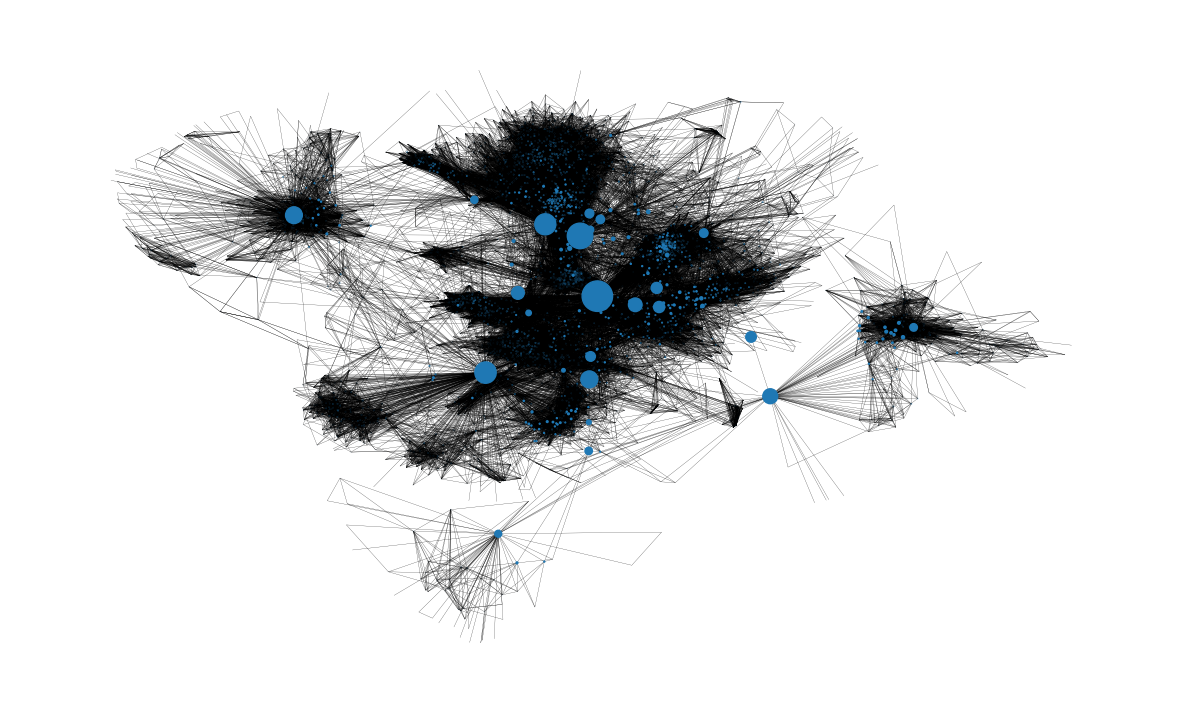

In [ ]:
# Visulaize betweeness centrality in the grapgh

# set up nodes size for a nice graph representation
node_size = [v * 1000 for v in betweenness_centrality.values()] # we magnify the node size to relfect centrality values

pos = nx.spring_layout(G, iterations=15, seed=1721) # iterations=15, seed=1721 are parameters specific to spring layout.
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": node_size, "with_labels": False, "width": 0.15}
nx.draw_networkx(G, pos=pos, ax=ax, **plot_options) # pass in the grapgh G and specified layout positions pos


## Network Communities

A community is a group of nodes, so that nodes inside the group are connected with many more edges than between groups.

While several algorithms exists to detect communities, we will only be looking at the Louvain community detection algorithm.

A full list of available community detection algorithms can be foud [here](https://networkx.org/documentation/stable/reference/algorithms/community.html)



### Louvain Algorithm



The Louvain Community Detection Algorithm is a method used to automatically determine the best partition of a graph, effectively identifying communities within the network. By applying this algorithm, we can find communities without explicitly specifying the number of communities to be detected.


Once the communities are identified, we can iterate through them and create a colors list which will assign the same color to nodes that belong to the same community, enhancing visual distinction. Lastly we print the total number of communities found.

To apply the Louvain algorithm using the NetworkX community library, we can call the function **nx.community.louvain_communities(G)**, where G represents the graph. This function will return the communities detected by the algorithm.

In [ ]:
colors = ["" for x in range(G.number_of_nodes())]  # initialize colors list
counter = 0
for com in nx.community.louvain_communities(G):
    color = "#%06X" % randint(0, 0xFFFFFF)  # creates random RGB color
    counter += 1
    for node in list(com):  # fill colors list with the particular color for the community nodes
        colors[node] = color
counter

16

In detail, 16 communities were detected. Now the communities are showcased in the graph by adding an additonal parameter "**node_color**" to out plotting code. Each community is depicted with a different color and its nodes are usually located close to each other.

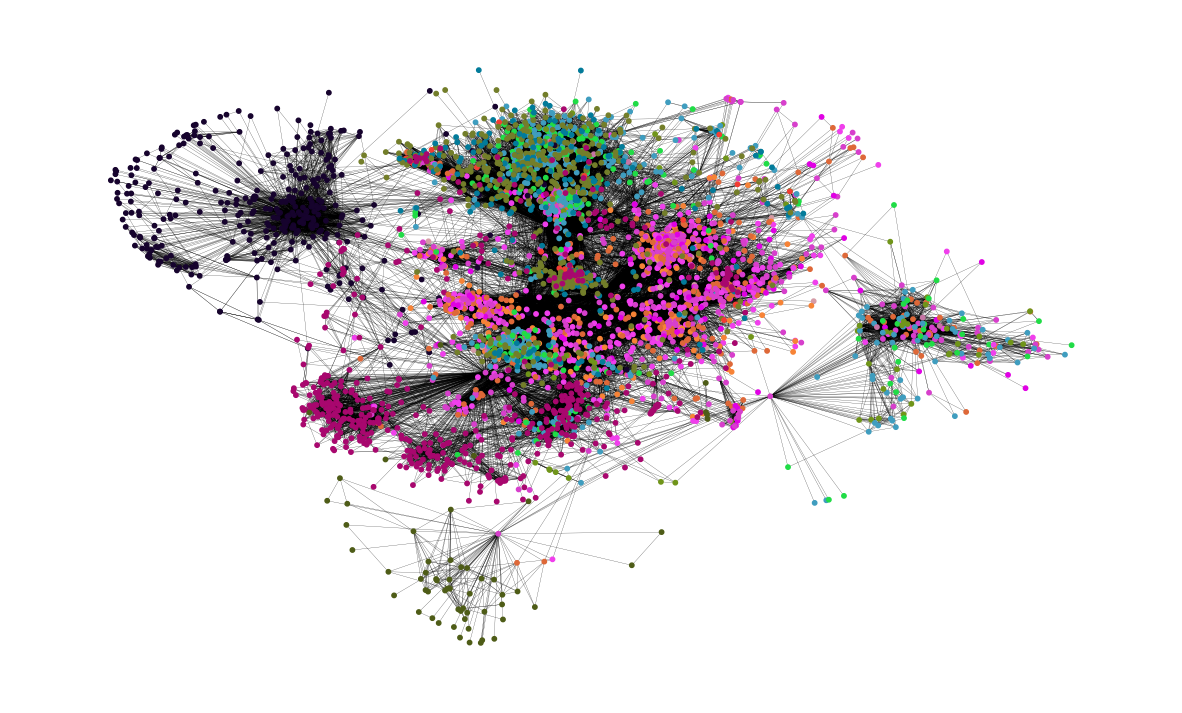

In [ ]:
pos = nx.spring_layout(G, iterations=15, seed=1721) # iterations=15, seed=1721 are parameters specific to spring layout.
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15, "node_color": colors}
nx.draw_networkx(G, pos=pos, ax=ax, **plot_options)

#### Louvain partitions
We can utilize the function **.louvain_partitions()** in NetworkX to obtain partitions for each level of the Louvain Community Detection Algorithm. This function explores different levels of granularity in the community detection process, providing a hierarchical view of the communities within the network. It allows us to analyze the network's communities at different resolutions, gaining insights into both macro-scale and micro-scale structures.

In [ ]:
# Visualizes community partitions at multiple granularity levels

# Obtain partitions for each level of the Louvain algorithm
partitions = list(nx.community.louvain_partitions(G))

# Create a colors list for each partition to assign the same color to nodes within each community
for level, partition in enumerate(partitions):
  # print(partition)
  colors = ["" for x in range(G.number_of_nodes())]  # initialize colors list

  counter = 0
  for com in partition:
      color = "#%06X" % randint(0, 0xFFFFFF)  # creates random RGB color
      counter += 1
      for node in list(com):  # fill colors list with the particular color for the community nodes
          colors[node] = color
  print("Number of communities found in partition ", level," : " ,counter)

  # Visualize the comminites found for each partition level
  pos = nx.spring_layout(G, iterations=15, seed=1721) # iterations=15, seed=1721 are parameters specific to spring layout.
  fig, ax = plt.subplots(figsize=(15, 9))
  ax.set_title(f"Louvain Clustering Partition Level {level}")
  plot_options = {"node_size": 10, "with_labels": False, "width": 0.15, "node_color": colors}
  nx.draw_networkx(G, pos=pos, ax=ax, **plot_options)

  # Show the plot
  plt.show()



This cell output is too large and can only be displayed while logged in.
